<a href="https://colab.research.google.com/github/Waranika/DCU-EE425-IPA/blob/main/IPA1/IPA1_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from skimage import io, filters, data, morphology
from skimage.measure import label, regionprops
from skimage.filters import gaussian
import matplotlib.patches as mpatches
from skimage.color import rgb2gray, label2rgb
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border

In [103]:
image = io.imread("coins.jpg")

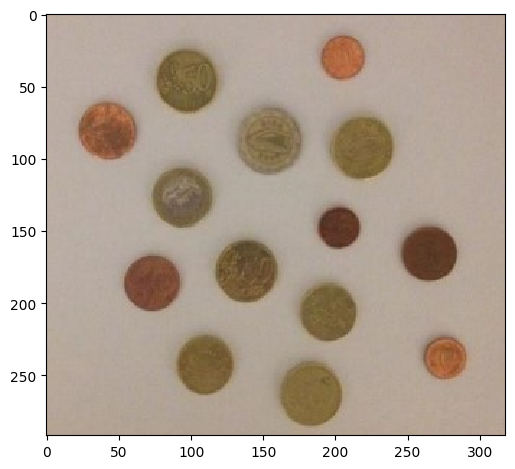

In [104]:
io.imshow(image)

Convert to grayscale

In [105]:
image2 = rgb2gray(image)

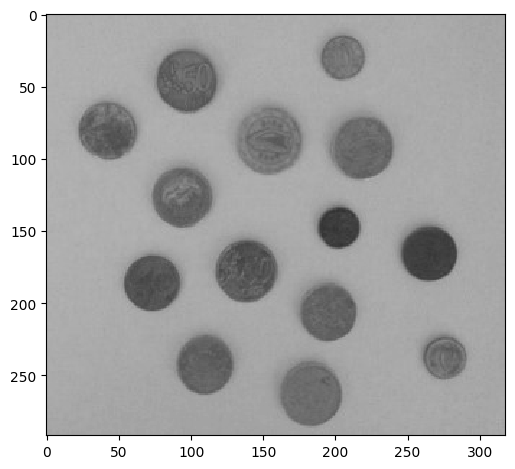

In [106]:
io.imshow(image2)

Apply gaussian

In [107]:
gauss_filtered = gaussian(image2, sigma=0.5)

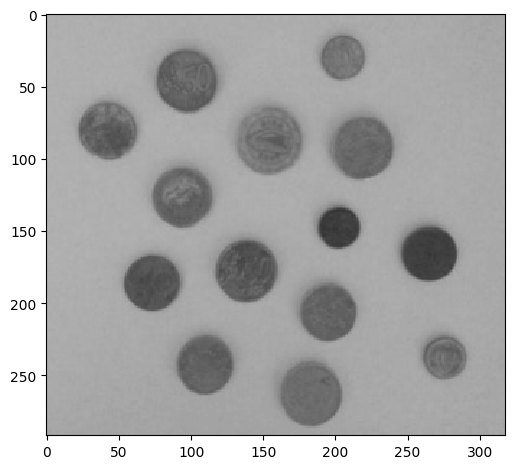

In [108]:
io.imshow(gauss_filtered)

Apply data driven threshold

In [109]:
thresh = threshold_otsu(gauss_filtered)
binary = gauss_filtered > thresh

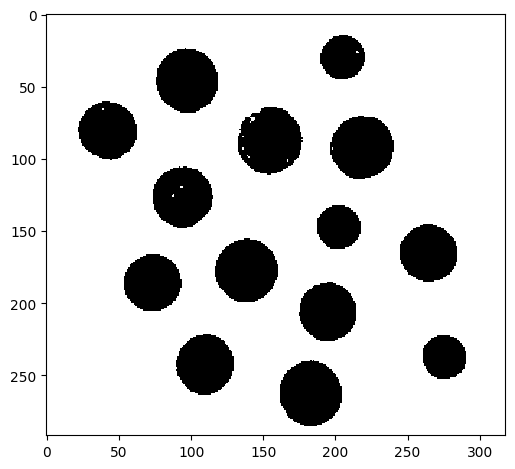

In [110]:
io.imshow(binary)

Remove binary blobs (objects below certain size)

In [111]:
binary = morphology.remove_small_objects(binary, 50)
binary = morphology.remove_small_holes(binary, 50)

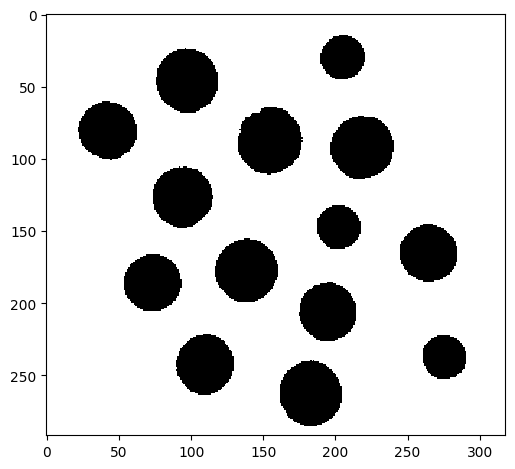

In [112]:
io.imshow(binary)

Dilate image

In [113]:
SE = morphology.disk(3)
binary = morphology.binary_dilation(binary, SE)

DISPLAY RESULTS

<ipython-input-114-f43f7d0bae3e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])


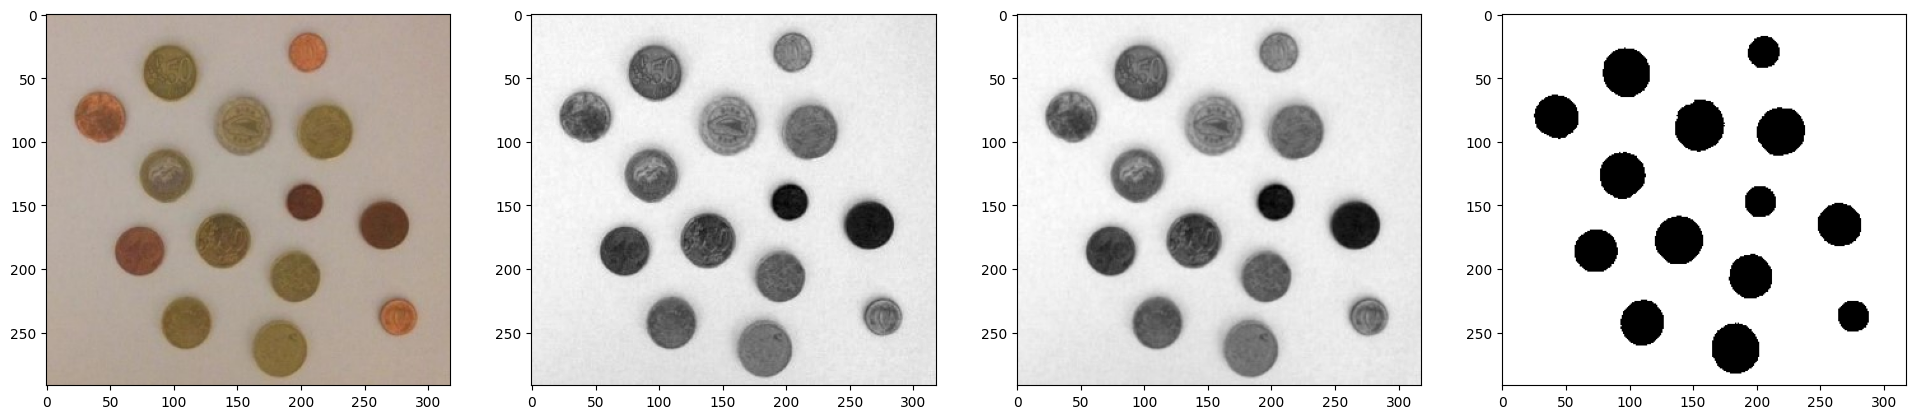

In [114]:
figs, ax = plt.subplots(1, 4, figsize=(24,9))

ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
#ax[0].set_title("Original")
ax[1].imshow(image2, cmap=plt.cm.gray)
ax[2].imshow(gauss_filtered, cmap=plt.cm.gray)
ax[3].imshow(binary, cmap=plt.cm.gray)

plt.show()


Label image regions

In [115]:
label_image = label(binary)

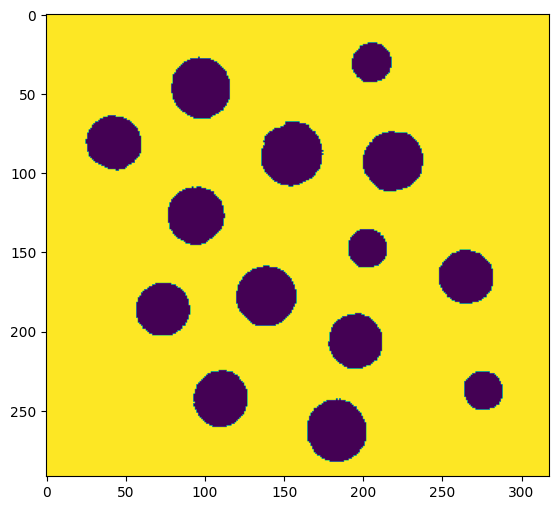

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(label_image)

Size each region

In [117]:
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 0:
        # draw rectangle around segmented coins
        print("a")
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

a


<Figure size 640x480 with 0 Axes>